In [1]:
!pip install pgmpy

In [2]:
# First import MarkovNetwork class from pgmpy.models
from pgmpy.models import MarkovNetwork
model = MarkovNetwork([('A', 'B'), ('B', 'C')])
model.add_node('D')
model.add_edges_from([('C', 'D'), ('D', 'A')])

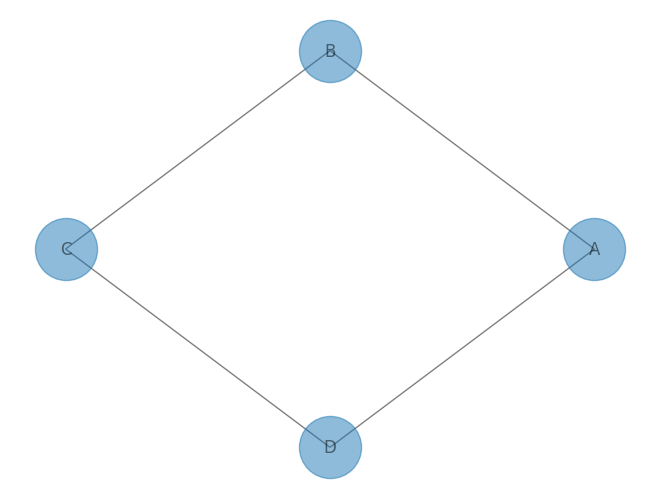

In [3]:
import networkx as nx
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [4]:
from pgmpy.factors.discrete import DiscreteFactor
factor_a_b = DiscreteFactor(variables=['A', 'B'],cardinality=[2, 2],values=[90, 100, 1, 10])
factor_b_c = DiscreteFactor(variables=['B', 'C'],cardinality=[2, 2],values=[10, 80, 70, 30])
factor_c_d = DiscreteFactor(variables=['C', 'D'],cardinality=[2, 2],values=[10, 1, 100, 90])
factor_d_a = DiscreteFactor(variables=['D', 'A'],cardinality=[2, 2],values=[80, 60, 20, 10])

In [5]:
model.add_factors(factor_a_b, factor_b_c,factor_c_d, factor_d_a)
model.get_factors()

[<DiscreteFactor representing phi(A:2, B:2) at 0x11d8aae40>,
 <DiscreteFactor representing phi(B:2, C:2) at 0x11d8e8410>,
 <DiscreteFactor representing phi(C:2, D:2) at 0x11d8e8190>,
 <DiscreteFactor representing phi(D:2, A:2) at 0x11da0c640>]

In [6]:
model.get_local_independencies()

(A ⟂ C | D, B)
(B ⟂ D | C, A)
(C ⟂ A | D, B)
(D ⟂ B | C, A)

In [7]:
from pgmpy.inference import BeliefPropagation
bp_infer = BeliefPropagation(model)
marginals = bp_infer.map_query(variables=['A','B','C','D'])
print(marginals)

{'A': 0, 'B': 0, 'C': 1, 'D': 0}
